In [58]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score

In [2]:
file_path = "UniversalBank.csv"
df = pd.read_csv(file_path)
df.head()

ID  Age  Experience  Income  ZIP Code  Family  CCAvg  Education  Mortgage  \
0   1   25           1      49     91107       4    1.6          1         0   
1   2   45          19      34     90089       3    1.5          1         0   
2   3   39          15      11     94720       1    1.0          1         0   
3   4   35           9     100     94112       1    2.7          2         0   
4   5   35           8      45     91330       4    1.0          2         0   

   Personal Loan  Securities Account  CD Account  Online  CreditCard  
0              0                   1           0       0           0  
1              0                   1           0       0           0  
2              0                   0           0       0           0  
3              0                   0           0       0           0  
4              0                   0           0       0           1

In [18]:
X=df[['Experience','Income','Family','CCAvg','Mortgage']]
y=df[['Personal Loan','Securities Account','CD Account','Online','CreditCard']]
X_train,X_test,y_train,y_test = train_test_split(X,y,random_state=0)

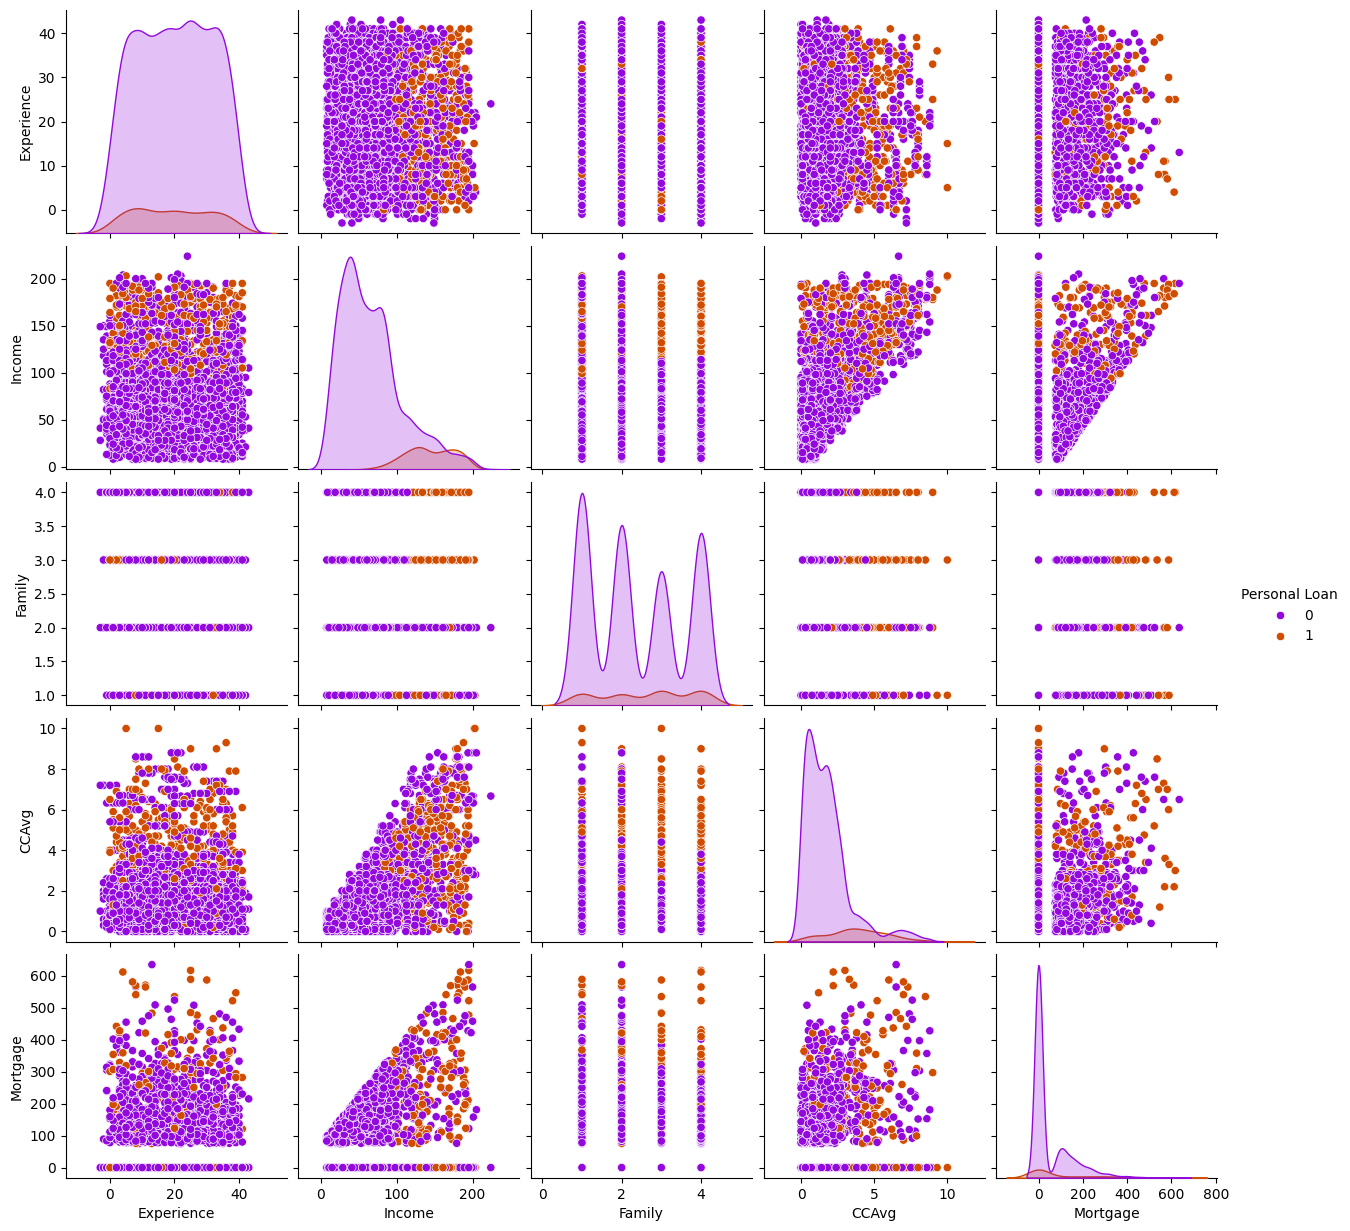

In [19]:
plot_df = X_train.copy()
plot_df['Personal Loan']=y_train['Personal Loan']
sns.pairplot(plot_df,hue = 'Personal Loan',palette='gnuplot',markers='o')
plt.show()

Mortgage and Experience Bad predictors for personal loan
Whereas Income and CCAvg are good predictors


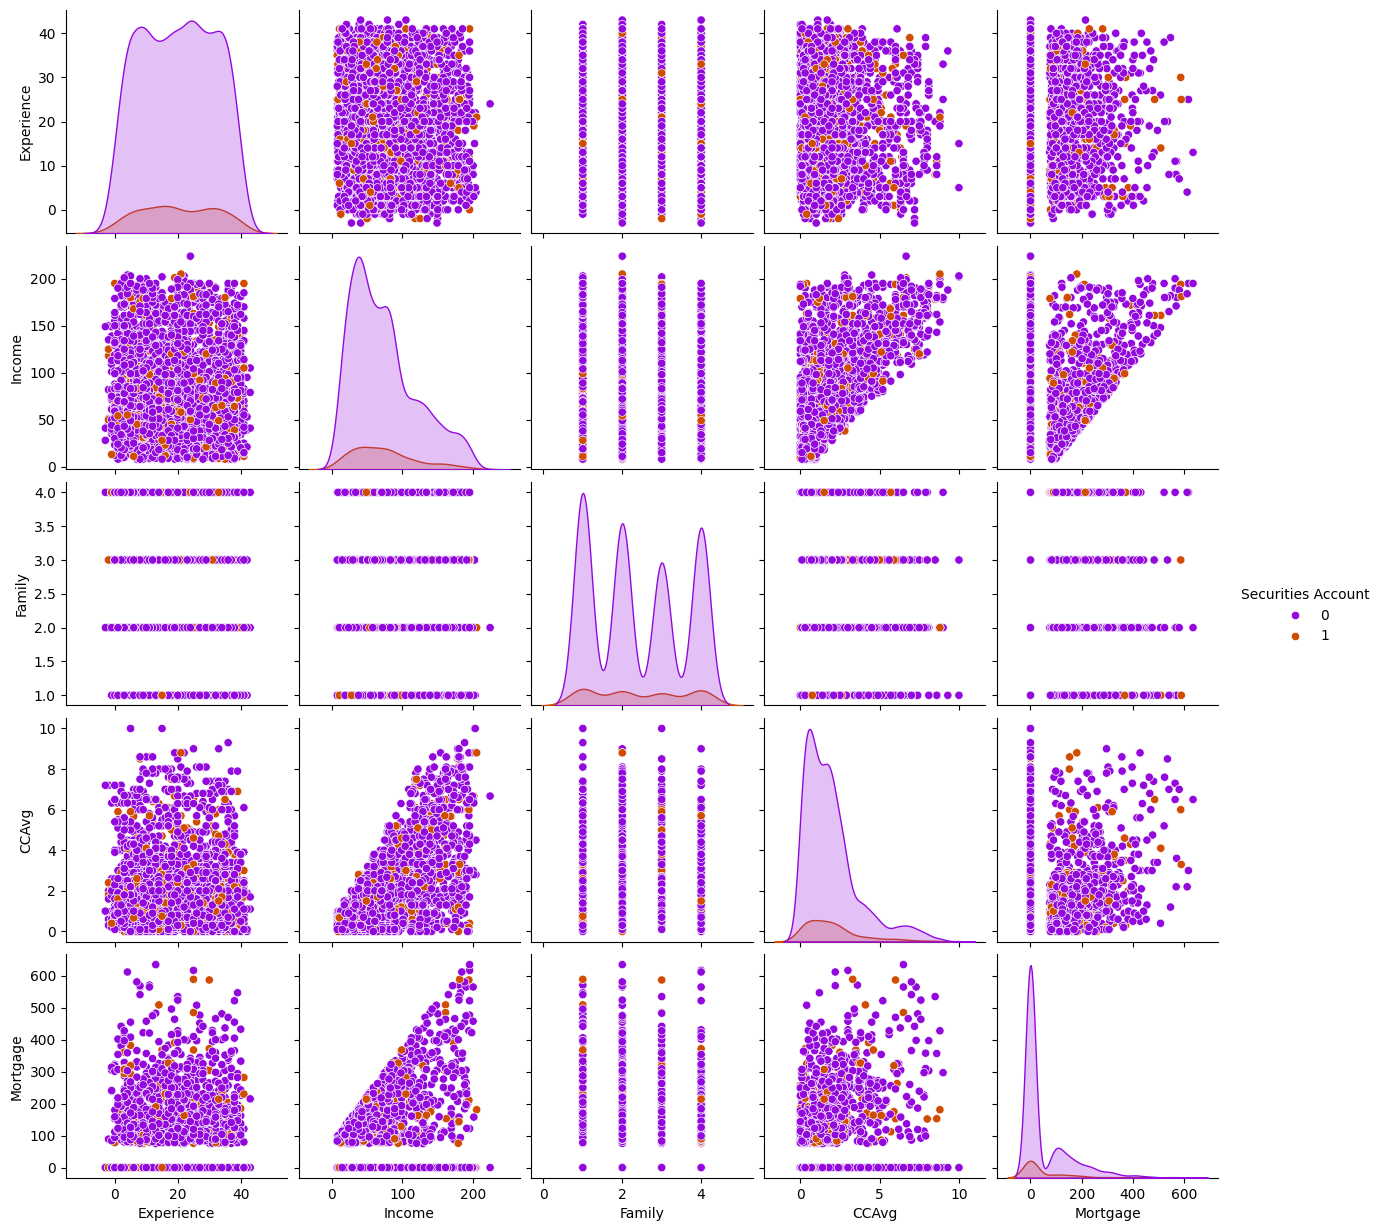

In [21]:
plot_df = X_train.copy()
plot_df['Securities Account']=y_train['Securities Account']
sns.pairplot(plot_df,hue = 'Securities Account',palette='gnuplot',markers='o')
plt.show()

Here Securities Account doesnt have a good predictor therefore it is an independent variable

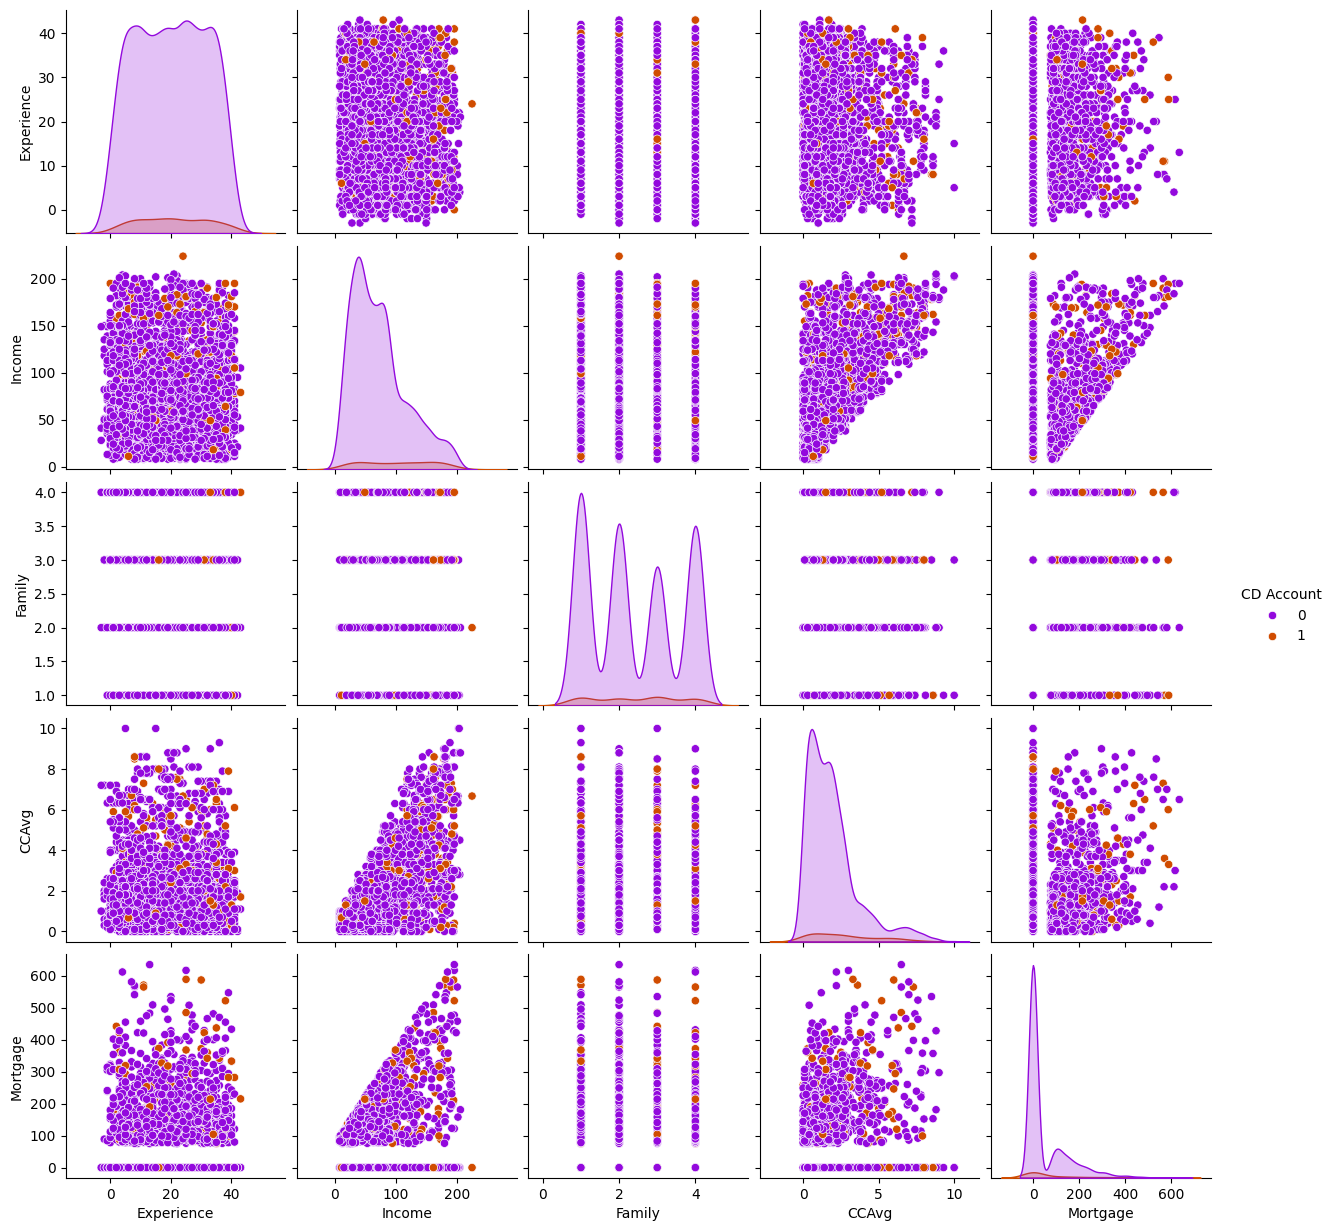

In [22]:
plot_df = X_train.copy()
plot_df['CD Account']=y_train['CD Account']
sns.pairplot(plot_df,hue = 'CD Account',palette='gnuplot',markers='o')
plt.show()

In this plot, in the income distribution plot, the spread for CD account existing(1) is shifted to the right. Meaning High income means CD account =1 has higher possibility.
Also in income vs ccavg, more orange dots(CD Acc=1) are present in top right, meaning people with high income and high credit card spending are most likely to have a CD account

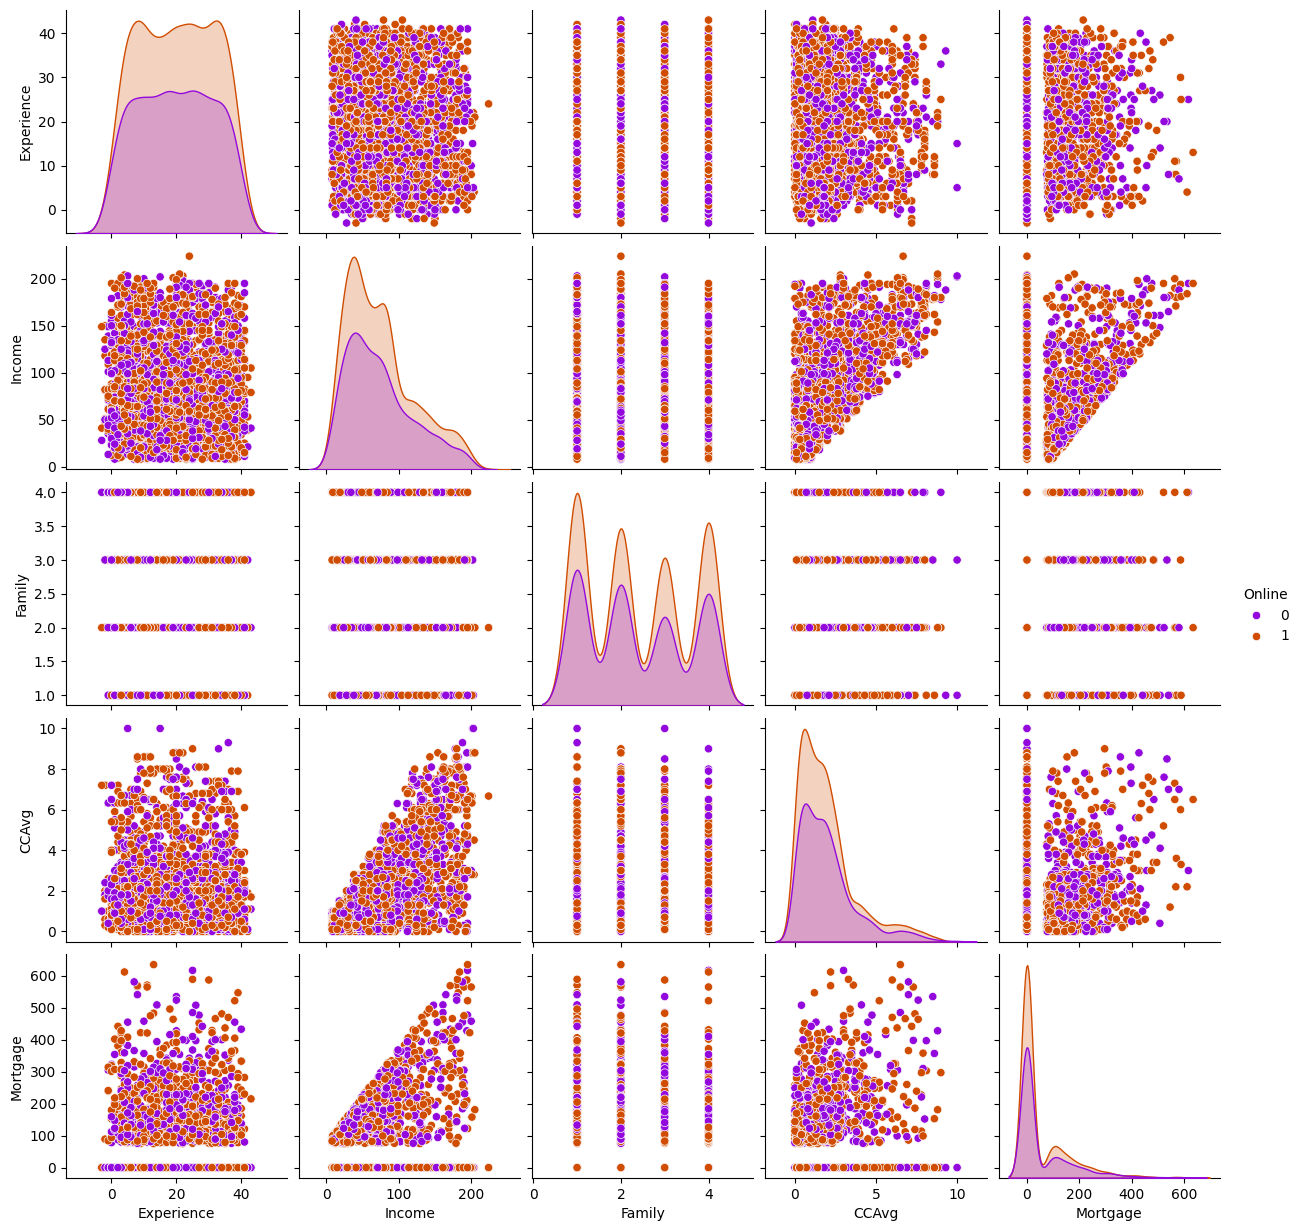

In [23]:
plot_df = X_train.copy()
plot_df['Online']=y_train['Online']
sns.pairplot(plot_df,hue = 'Online',palette='gnuplot',markers='o')
plt.show()

No relation bw target var Online and dependent variables

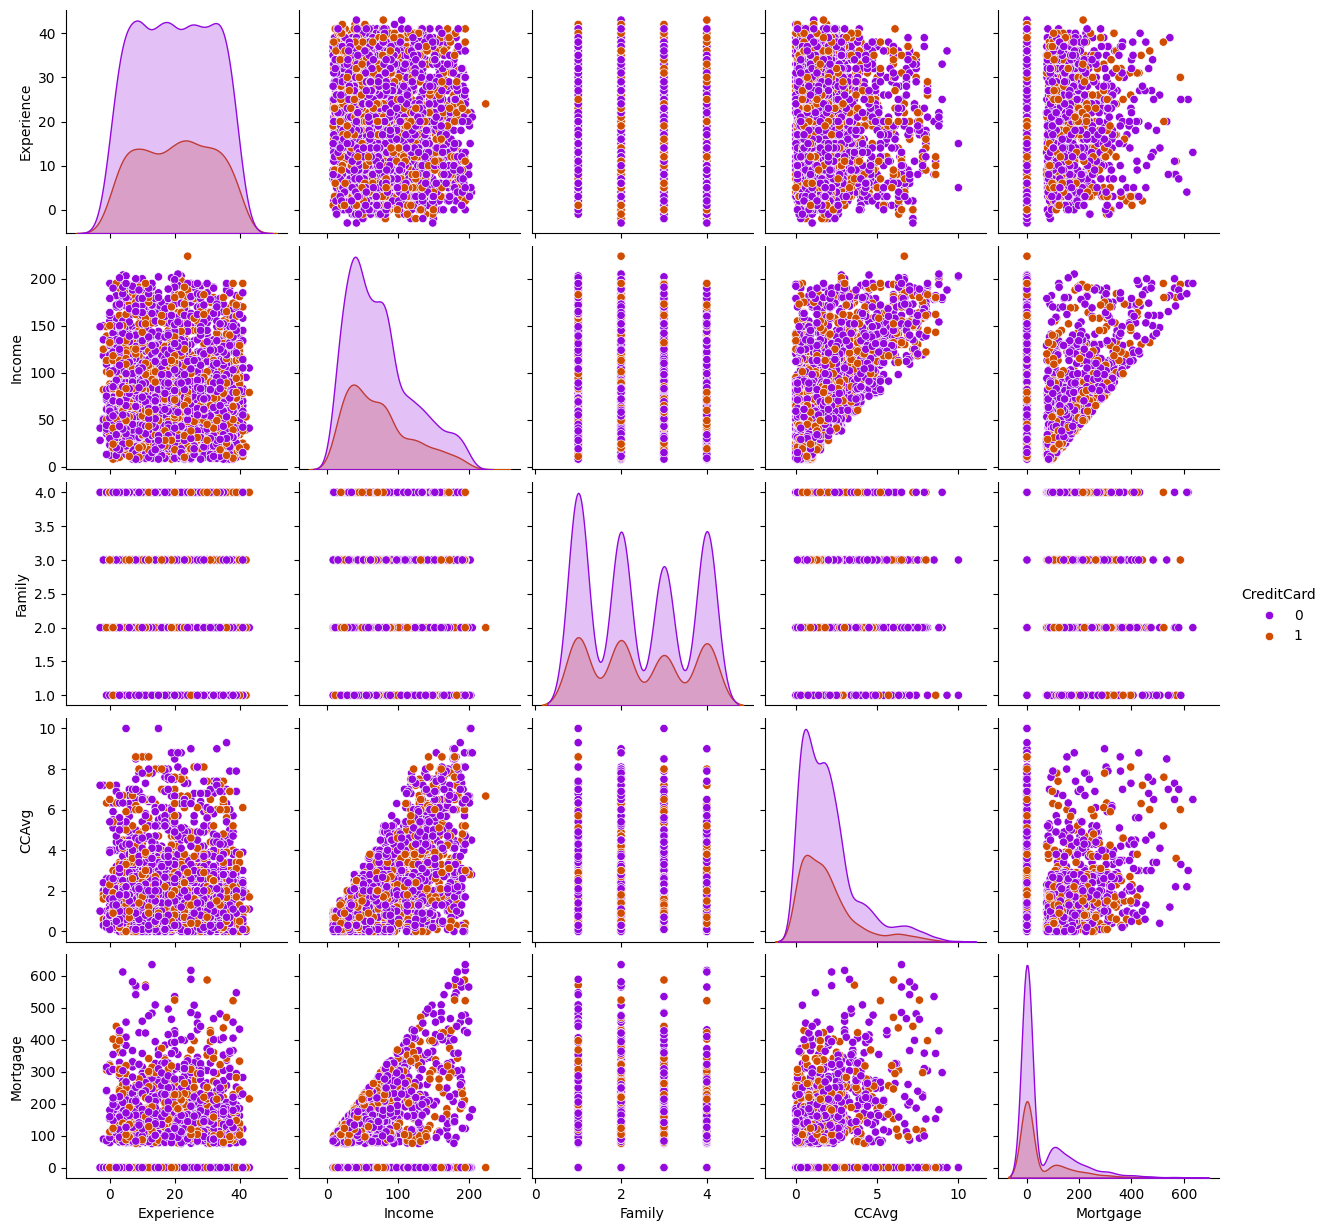

In [24]:
plot_df = X_train.copy()
plot_df['CreditCard']=y_train['CreditCard']
sns.pairplot(plot_df,hue='CreditCard',palette='gnuplot',markers='o')
plt.show()

Same no relation

Therefore lets change the training and testing datasets to income,CCavg and personal loan,CD account also lets scale the values

In [56]:

scaler = StandardScaler()
df[['Income','CCAvg']]=scaler.fit_transform(df[['Income','CCAvg']])
df.head()

ID  Age  Experience    Income  ZIP Code  Family     CCAvg  Education  \
0   1   25           1 -0.538229     91107       4 -0.193385          1   
1   2   45          19 -0.864109     90089       3 -0.250611          1   
2   3   39          15 -1.363793     94720       1 -0.536736          1   
3   4   35           9  0.569765     94112       1  0.436091          2   
4   5   35           8 -0.625130     91330       4 -0.536736          2   

   Mortgage  Personal Loan  Securities Account  CD Account  Online  CreditCard  
0         0              0                   1           0       0           0  
1         0              0                   1           0       0           0  
2         0              0                   0           0       0           0  
3         0              0                   0           0       0           0  
4         0              0                   0           0       0           1

In [48]:
X=df[['Income','CCAvg']]
y=df[['Personal Loan','CD Account']]
X_train,X_test,y_train,y_test = train_test_split(X,y,random_state=0)


In [49]:
knn = KNeighborsClassifier(n_neighbors=5)

In [50]:
knn.fit(X_train,y_train)

KNeighborsClassifier()

In [62]:
y_pred = knn.predict(X_test)

In [63]:
accuracy_score(y_test,y_pred)

0.8864